# Machine Learning

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV, LassoLars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor

from joblib import dump

import math

## Découpage du dataset

In [2]:
df = pd.read_csv('../csv/donnees_clean.csv')

In [3]:
X = df.drop('charges', axis=1)
y = df['charges']

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,Oui,southwest,16884.92
1,18,male,33.8,1,Non,southeast,1725.55
2,28,male,33.0,3,Non,southeast,4449.46
3,33,male,22.7,0,Non,northwest,21984.47
4,32,male,28.9,0,Non,northwest,3866.86
...,...,...,...,...,...,...,...
1332,50,male,31.0,3,Non,northwest,10600.55
1333,18,female,31.9,0,Non,northeast,2205.98
1334,18,female,36.9,0,Non,southeast,1629.83
1335,21,female,25.8,0,Non,southwest,2007.94


## Nettoyage des données

In [5]:
def bmi(bmi):
    if bmi < 18.5:
        return "maigreur"
    elif bmi < 25:
        return "normal"
    elif bmi < 30:
        return "surpoids"
    elif bmi < 35:
        return "obesite_moderee"
    elif bmi < 40:
        return "obesite_severe"
    else:
        return "obesite_morbide"

In [6]:
X['bmi'] = X['bmi'].apply(lambda x : bmi(x))

X

,age,sex,bmi,children,smoker,region
0,19,female,surpoids,0,Oui,southwest
1,18,male,obesite_moderee,1,Non,southeast
2,28,male,obesite_moderee,3,Non,southeast
3,33,male,normal,0,Non,northwest
4,32,male,surpoids,0,Non,northwest
...,...,...,...,...,...,...
1332,50,male,obesite_moderee,3,Non,northwest
1333,18,female,obesite_moderee,0,Non,northeast
1334,18,female,obesite_severe,0,Non,southeast
1335,21,female,surpoids,0,Non,southwest


## Train_set & Test_set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.95, random_state=42)
X_train.head()

,age,sex,bmi,children,smoker,region
1302,43,male,surpoids,0,Oui,southwest
296,19,male,surpoids,0,Oui,southwest
573,62,female,obesite_severe,1,Non,northeast
1132,52,female,maigreur,0,Non,northwest
471,18,female,obesite_moderee,0,Non,northeast


## Dummy Modèle

In [8]:
dummy = DummyRegressor()

In [9]:
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.004178723670794193

## Création des Modèles

In [10]:
cat_var = ['smoker', 'sex', 'region', 'bmi']
num_var = ['age', 'children']

cat_transformer = OneHotEncoder(drop='if_binary')
num_transformer = RobustScaler()

encoder = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_var),
        ('num', num_transformer, num_var)
    ], 
    remainder='passthrough'
)

In [11]:
encoder.fit_transform(X).shape

(1337, 14)

In [12]:
models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), OrthogonalMatchingPursuit(), BayesianRidge(), ARDRegression(), PassiveAggressiveRegressor(), AdaBoostRegressor(), BaggingRegressor(Lasso()), RandomForestRegressor(), ExtraTreesRegressor()]

In [13]:
for model in models:
    pipe = Pipeline([
        ('enc', encoder), 
        ('poly', PolynomialFeatures()), 
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    score = round(score,4)

    prediction = pipe.predict(X_test)
    score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

    
    print(f"Nom du modèle : {model}, R2 score : {round(score *100, 2)} %, RMSE score : {round(score_rmse,2)}")

Nom du modèle : LinearRegression(), R2 score : 91.9 %, RMSE score : 4097.36
Nom du modèle : Lasso(), R2 score : 92.95 %, RMSE score : 3821.76


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.181e+08, tolerance: 1.820e+07
  model = cd_fast.enet_coordinate_descent(


Nom du modèle : Ridge(), R2 score : 92.66 %, RMSE score : 3901.66
Nom du modèle : ElasticNet(), R2 score : 53.05 %, RMSE score : 9864.5
Nom du modèle : OrthogonalMatchingPursuit(), R2 score : 91.55 %, RMSE score : 4185.61
Nom du modèle : BayesianRidge(), R2 score : 92.48 %, RMSE score : 3947.19
Nom du modèle : ARDRegression(), R2 score : 92.85 %, RMSE score : 3850.65
Nom du modèle : PassiveAggressiveRegressor(), R2 score : 93.21 %, RMSE score : 3751.52
Nom du modèle : AdaBoostRegressor(), R2 score : 69.92 %, RMSE score : 7896.09


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+08, tolerance: 1.885e+07
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.506e+09, tolerance: 1.779e+07
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Nom du modèle : BaggingRegressor(estimator=Lasso()), R2 score : 92.85 %, RMSE score : 3850.61
Nom du modèle : RandomForestRegressor(), R2 score : 87.88 %, RMSE score : 5012.21
Nom du modèle : ExtraTreesRegressor(), R2 score : 84.79 %, RMSE score : 5614.92


## Amélioration des Modèles

### RamdomizedSearchCV

Params Lasso :

- alpha
- copy_X
- fit_intercept
- max_iter
- positive
- precompute
- random_state
- selection
- tol
- warm_start

Params Ridge :

- alpha
- copy_X 
- fit_intercept 
- max_iter 
- positive 
- random_state 
- solver 
- tol

Params ElasticNet :

- alpha
- copy_X 
- fit_intercept 
- l1_ratio 
- max_iter 
- positive 
- precompute 
- random_state 
- selection 
- tol 
- warm_start

Params ARDRegression :

- alpha_1
- alpha_2
- compute_score
- copy_X
- fit_intercept
- lambda_1
- lambda_2
- n_iter
- threshold_lambda
- tol
- verbose

In [14]:
# models = [Lasso(), Ridge(), ElasticNet(), ARDRegression()]

# for model in models:
#     pipe = Pipeline([
#         ('enc', encoder), 
#         ('poly', PolynomialFeatures()), 
#         ('model', model),
#     ])
    
#     string = str(model)



#     param_grid = {
#         'model__fit_intercept': [True, False],
#         'model__copy_X': [True, False],
#         'model__tol' : np.arange(1, 0.0001, -0.001)
#     }

#     if string == "Lasso()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__precompute'] = [True, False]
#         param_grid['model__selection'] = ['cyclic', 'random']
#         param_grid['model__warm_start'] = [True, False]
#         param_grid['model__max_iter'] = np.arange(100, 5000, 100)

#     elif string == "Ridge()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__max_iter'] = np.arange(100, 5000, 100)

#     elif string == "ElasticNet()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__precompute'] = [True, False]
#         param_grid['model__selection'] = ['cyclic', 'random']
#         param_grid['model__warm_start'] = [True, False]
#         param_grid['model__l1_ratio'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__max_iter'] = np.arange(100, 5000, 100)

#     elif string == "ARDRegression()":
#         param_grid = {
#             'model__alpha_1': np.arange(0.000001, 0.0001, 0.00001),
#             'model__alpha_2': np.arange(0.000001, 0.0001, 0.00001),
#             'model__lambda_1': np.arange(0.000001, 0.0001, 0.00001),
#             'model__lambda_2': np.arange(0.000001, 0.0001, 0.00001),
#             'model__compute_score': [True, False],
#             'model__threshold_lambda': np.arange(10000, 20000, 100),
#             'model__fit_intercept': [True, False],
#             'model__copy_X': [True, False],
#         }

#     grid = RandomizedSearchCV(pipe, param_grid, cv=5, random_state=0)

#     grid.fit(X_train, y_train)

#     score = grid.best_score_
#     score = round(score,4)

#     params = grid.best_params_

#     print(f"###### Modèle : {model}, Meilleur score : {round(score *100, 2)}%, Meilleurs paramètres : {params}")

### GridSearchCV

In [15]:
# models = [Lasso(), Ridge(), ElasticNet(), ARDRegression(), BaggingRegressor()]

# for model in models:
#     pipe = Pipeline([
#         ('enc', encoder), 
#         ('poly', PolynomialFeatures()), 
#         ('model', model),
#     ])
    
#     string = str(model)

#     param_grid = {
#         'model__fit_intercept': [True, False],
#         'model__copy_X': [True, False],
#         # 'model__tol' : np.arange(1, 0.01, -0.01),
#     }

#     if string == "Lasso()":
#         # param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__precompute'] = [True, False]
#         param_grid['model__selection'] = ['cyclic', 'random']
#         param_grid['model__warm_start'] = [True, False]
#         # param_grid['model__max_iter'] = np.arange(300, 600, 10)

#     elif string == "Ridge()":
#         # param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
#         param_grid['model__positive'] = [True, False]
#         # param_grid['model__max_iter'] = np.arange(300, 600, 10)

#     elif string == "ElasticNet()":
#         # param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__precompute'] = [True, False]
#         param_grid['model__selection'] = ['cyclic', 'random']
#         param_grid['model__warm_start'] = [True, False]
#         param_grid['model__l1_ratio'] = np.arange(0.1, 1, 0.1)
#         # param_grid['model__max_iter'] = np.arange(300, 600, 10)

#     # elif string == "ARDRegression()":
#     #     param_grid = {
#     #         'model__alpha_1': np.arange(0.000001, 0.0001, 0.00001),
#     #         'model__alpha_2': np.arange(0.000001, 0.0001, 0.00001),
#     #         'model__lambda_1': np.arange(0.000001, 0.0001, 0.00001),
#     #         'model__lambda_2': np.arange(0.000001, 0.0001, 0.00001),
#     #         'model__compute_score': [True, False],
#     #         'model__threshold_lambda': np.arange(10000, 20000, 100),
#     #         'model__fit_intercept': [True, False],
#     #         'model__copy_X': [True, False],
#     #     }

#     elif string == "BaggingRegressor()":
#         param_grid = {
#             'model__estimator': [Lasso(), Ridge(), ElasticNet()],
#             'model__n_estimators': np.arange(1, 20, 1)
#         }

#     grid = GridSearchCV(pipe, param_grid, cv=5)

#     grid.fit(X_train, y_train)

#     score = grid.best_score_
#     score = round(score,4)

#     params = grid.best_params_

#     print(f"###### Modèle : {model.__class__.__name__}, Meilleur score : {round(score *100, 2)}%, Meilleurs paramètres : {params}")

### Résultats avec hyperparamètres sélectionnés

In [16]:
models = [
    Lasso(alpha=0.9, positive=True, precompute=True, warm_start=True),
    Ridge(alpha=0.9, solver='auto'),
    ElasticNet(alpha=0.1, l1_ratio=0.9, positive=True, precompute=True, selection='random', warm_start=True),
    ARDRegression(threshold_lambda=10000, lambda_2=1e-05, lambda_1=5e-05, fit_intercept=False, copy_X=True, compute_score=False, alpha_2=7e-05, alpha_1=2e-05),
    BaggingRegressor(Lasso(alpha=0.9, positive=True, precompute=True, warm_start=True), n_estimators=9)
    ]

list_voting = []
for model in models:
    list_voting.append((f"{model.__class__.__name__}", model))

voting = StackingRegressor(list_voting, Lasso(alpha=0.9))

models.append(voting)

list_models = []

for model in models:
    pipe = Pipeline([
        ('enc', encoder), 
        ('poly', PolynomialFeatures()), 
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    score = round(score,4)

    prediction = pipe.predict(X_test)
    score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

    list_models.append([f"{model.__class__.__name__}", f"{round(score *100, 2)}%", f"{round(score_rmse,2)}"])
    
    print(f"Nom du modèle : {model.__class__.__name__}, R2 score : {round(score *100, 2)}%, RMSE score : {round(score_rmse,2)}")

Nom du modèle : Lasso, R2 score : 92.74%, RMSE score : 3877.9
Nom du modèle : Ridge, R2 score : 92.69%, RMSE score : 3893.19
Nom du modèle : ElasticNet, R2 score : 87.66%, RMSE score : 5057.53
Nom du modèle : ARDRegression, R2 score : 92.77%, RMSE score : 3871.91
Nom du modèle : BaggingRegressor, R2 score : 92.48%, RMSE score : 3948.99


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76372289.97024536, tolerance: 15707550.792622559
  model = cd_fast.enet_coordinate_descent_gram(


Nom du modèle : StackingRegressor, R2 score : 92.61%, RMSE score : 3912.97


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+10, tolerance: 1.820e+07
  model = cd_fast.enet_coordinate_descent(


In [17]:
df_list_models = pd.DataFrame(list_models,columns=['modele', "r2_score", "score_rmse"])

df_list_models.sort_values('r2_score', ascending=False)

,modele,r2_score,score_rmse
3,ARDRegression,92.77%,3871.91
0,Lasso,92.74%,3877.9
1,Ridge,92.69%,3893.19
5,StackingRegressor,92.61%,3912.97
4,BaggingRegressor,92.48%,3948.99
2,ElasticNet,87.66%,5057.53


## Sélection et enregistrement du Modèle

In [18]:
model = Lasso(alpha=0.9, positive=True, precompute=True, warm_start=True)

pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures()), 
    ('model', model)
])

pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
score = round(score,4)

prediction = pipe.predict(X_test)
score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

print(f"Nom du modèle : {model.__class__.__name__}, R2 score : {round(score *100, 2)}%, RMSE score : {round(score_rmse,2)}")

dump(pipe, f"../models/{model.__class__.__name__}.pkl")

Nom du modèle : Lasso, R2 score : 92.74%, RMSE score : 3877.9


['../models/Lasso.pkl']

In [19]:
pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures()), 
    ('model', voting),
])

pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
score = round(score,4)

prediction = pipe.predict(X_test)
score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

print(f"Nom du modèle : {voting.__class__.__name__}, R2 score : {round(score *100, 2)}%, RMSE score : {round(score_rmse,2)}")

dump(pipe, f"../models/{voting.__class__.__name__}.pkl")

Nom du modèle : StackingRegressor, R2 score : 92.74%, RMSE score : 3878.84


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23055607.454286575, tolerance: 13172645.312870245
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.316e+10, tolerance: 1.820e+07
  model = cd_fast.enet_coordinate_descent(


['../models/StackingRegressor.pkl']

## Learning curves

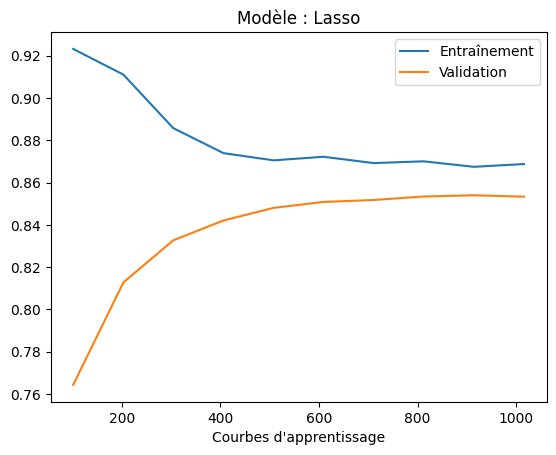

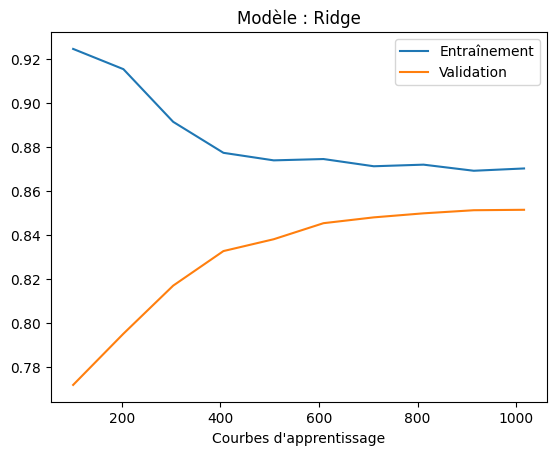

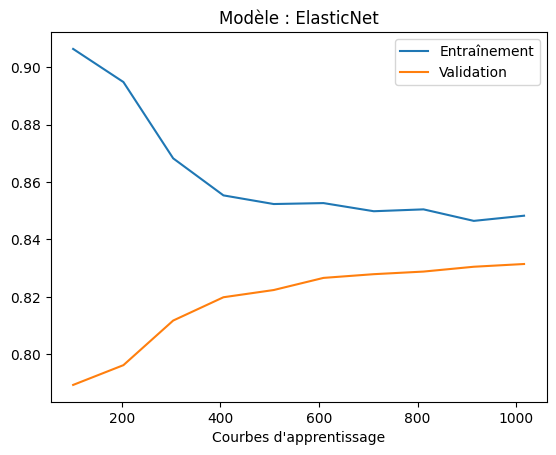

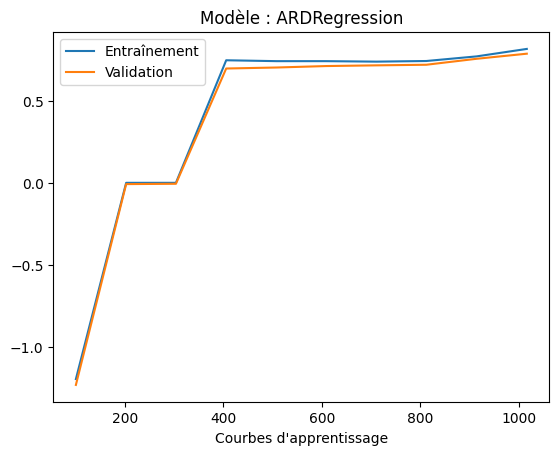

/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26152470.420007467, tolerance: 1458320.4282455952
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21075612.18948567, tolerance: 1311286.5047843624
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2244052.6847703457, tolerance: 1483162.2892139347
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/li

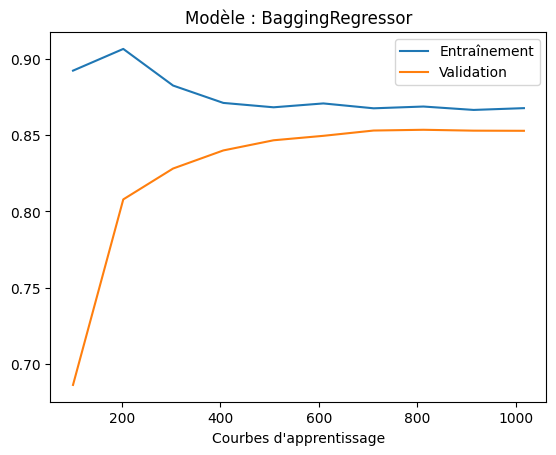

/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78670412.65966392, tolerance: 1683168.5226748516
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6975359.654114723, tolerance: 1586078.8282648579
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2510638.4685406685, tolerance: 1138346.4870781393
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/lin

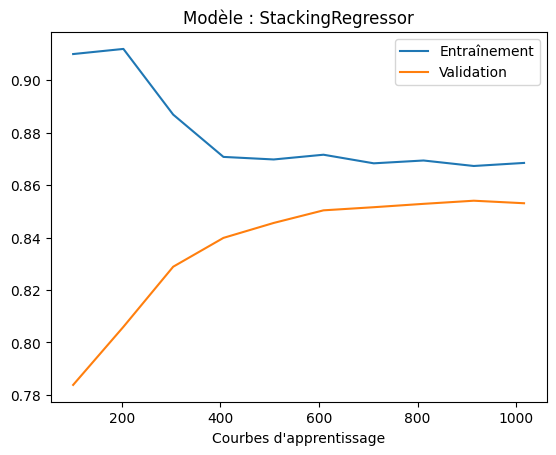

In [20]:
for model in models:
    pipe = Pipeline([
        ('enc', encoder), 
        ('poly', PolynomialFeatures()), 
        ('model', model),
    ])

    N, train_score, val_score = learning_curve(pipe, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)

    # print(N)
    # print(train_score)
    # print(val_score)

    plt.plot(N, train_score.mean(axis=1), label='Entraînement')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.title(f"Modèle : {model.__class__.__name__}")
    plt.xlabel('Courbes d\'apprentissage')
    plt.legend()
    plt.show()